MECANUM WHEEL

In [14]:
r = 0.0635
lx = 0.300
ly = 0.300
vel_x = 0.0
vel_y = 0.0
vel_z = 0.1

In [15]:
def calculate_w(r,lx,ly,vel_x,vel_y,vel_z):
    global w_fl,w_fr,w_rl,w_rr,dir1,dir2,dir3,dir4
    w_fl = (vel_x-vel_y-(lx+ly)*vel_z)/r
    w_fr = (vel_x+vel_y+(lx+ly)*vel_z)/r
    w_rl = (vel_x+vel_y-(lx+ly)*vel_z)/r
    w_rr = (vel_x-vel_y+(lx+ly)*vel_z)/r 

    dir1 = w_fl/abs(w_fl)
    dir2 = w_fr/abs(w_fr)
    dir3 = w_rl/abs(w_rl)
    dir4 = w_rr/abs(w_rr)

In [16]:
calculate_w(r,lx,ly,vel_x,vel_y,vel_z)
print("wheel-fl--> "+str(round(w_fl,2))+"--> "+str(dir1))
print("wheel-fr--> "+str(round(w_fr,2))+"--> "+str(dir2))
print("wheel-rl--> "+str(round(w_rl,2))+"--> "+str(dir3))
print("wheel-rr--> "+str(round(w_rr,2))+"--> "+str(dir4))

wheel-fl--> -0.94--> -1.0
wheel-fr--> 0.94--> 1.0
wheel-rl--> -0.94--> -1.0
wheel-rr--> 0.94--> 1.0


PID Control

In [17]:
def find_stable(lst,condition):
    return [i for i,elem in enumerate(lst) if condition(elem)]

In [1]:
import matplotlib.pyplot as plt
def pid(kp,ki,kd,vel_target,itr):
    err,prv_err,i_err,d_err,vel_act = 0,0,0,0,0
    vel_acts = []
    vel_targets = []
    itrs = []
    errs = []
    outputs = []
    for i in range (itr):
        err  = vel_target - vel_act
        i_err += err
        d_err = (err-prv_err)
        output = kp*err + ki*i_err + kd*d_err #pwm

        vel_act = output/400

        prv_err = err

        errs.append(err)
        vel_acts.append(vel_act)
        itrs.append(i)
        vel_targets.append(vel_target)
        outputs.append(output)

    ax = plt.subplot()

    ax.plot(vel_acts)
    ax.plot(vel_targets)
    ax.set(xlabel='iteration (times)', ylabel='velocity (m/s)',title='PID Control')
    ax.grid()
    print(vel_acts)
    plt.show()

15.0 6.666666666666667 8.4375
[0.010249999999999999, 0.016449375000000002, 0.022570814062500003, 0.028225161871093748, 0.03346808376368164, 0.03832793299888084, 0.04283279947472827, 0.04700860530912584, 0.050879387416685094, 0.054467426367061825, 0.05779337527366572, 0.06087637863058513, 0.06373418251324246, 0.0663832367263685, 0.06883878949073655, 0.071114975213444, 0.07322489584697216, 0.07518069630533399, 0.07699363437141281, 0.0786741454978856, 0.08023190287473136, 0.08167587310907946, 0.08301436783789602, 0.08425509157059725, 0.08540518603697521, 0.08647127129570845, 0.08745948384008105, 0.0883755119202516, 0.08922462828538896, 0.09001172053414393, 0.09074131924815523, 0.09141762407053018, 0.09204452787941012, 0.09262563919576612, 0.09316430295440606, 0.09366361975775389, 0.09412646372322687, 0.09455549902694274, 0.0949531952389835, 0.09532184153848794, 0.09566355989039506, 0.09598031725968675, 0.09627393693343449, 0.09654610901582206, 0.0967984001565541, 0.0970322625686484, 0.097

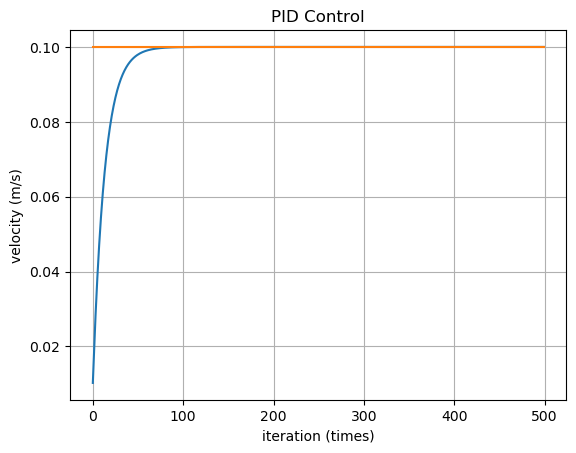

In [12]:
ku = 25
tu = 4.5
kp = 0.6*ku
ki = 1.2*ku/tu
kd = 0.075*ku*tu
print(kp,ki,kd)
# pid(kp,ki,kd,0.1,500,0.1)
pid(10,30,1,0.1,500)

In [8]:
distance = {}
factor_1 = {1,2,3,4}
factor_2 = {1,2,3,4}
for i in range(0,4):
    distance[i] = 100+i
print(distance[0])

100


In [54]:
a = (1,2)
b = (10,20)
c = ()
# for i in range(0,4):

print(a[0])
print(c)

1


In [ ]:
a = (1,2,3,4,5)
b = (10,20,30,40,50)
c = {100,200,300,400,500}
d = {1000,2000,3000,4000,5000}
print(a)
print(a[0])
print(c)
print(c[0])

In [1]:
encoder_list = [10,20,30,40]
encoder_prv_list = [5,5,5,5]
enc_0 = encoder_list[0]
enc_1 = encoder_list[1]
enc_2 = encoder_list[2]
enc_3 = encoder_list[3]

In [ ]:
for i in encoder_list:
    if i==0:
        dist_list = [0,0,0,0]
    else:
        for i in range(4):
            dist_list = [encoder_list[i]-encoder_prv_list[i]]

In [6]:
import numpy as np
enc_list = [10,20,30,40]
prv_enc_list = [0,0,0,0]
distance_list= []
tick_0 = 10
tick_1 = 100
elased = 10
for i in range(3):
    dis_f = (np.array(enc_list[0:2])-np.array(prv_enc_list[0:2]))/tick_0
    dis_r = (np.array(enc_list[2:4])-np.array(prv_enc_list[2:4]))/tick_1
    dis = np.concatenate((dis_f,dis_r))
    vel = dis/elased
    print(dis)
    print(np.round(vel,1))

[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]
[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]
[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]


In [11]:
vel_list =[0.1,0.1,0.2,0.2]
vel_t_list = [0.3,0.3,0.3,0.3]
kp = 100
err_list = np.array(vel_t_list) - np.array(vel_list)
pwm_list = kp * err_list

print(err_list)
print(pwm_list)

[0.2 0.2 0.1 0.1]
[20. 20. 10. 10.]


In [9]:
v = [10,20,30,0]
pwm = [10,10,10,10]
for i in range(3):
    for i in range(len(v)):
        if v[i] == 0:
            pwm[i] = 0
    print(pwm)

[10, 10, 10, 0]
[10, 10, 10, 0]
[10, 10, 10, 0]


In [1]:
import numpy as np
a123= [1,2,3,4]
print(a123)
print(np.array(a123)*2)

[1, 2, 3, 4]
[2 4 6 8]


In [2]:
import numpy as np
e=[1,2,3,4]
prv = [0,0,0,0]
# v = [10 20 30 40]
v_1 = np.array(e)
t = [20,30,40,50]
dis_1 = np.array(e[0:2]) - np.array(prv[0:2])
print(dis_1)
print(dis_1.tolist())

[1 2]
[1, 2]


In [4]:
pid = [1,1,1,1]
err = [1,2,3,4]
pid = (np.array(pid) + np.array(err))
print(pid)

[2 3 4 5]


In [ ]:
p = np.array([1,2,3])*10
i = np.array([5,4,3])*5
p_i = p+i
t = [22,33,44,55]
# print(p)
# print(i)

print(p_i)
for i in range(3):
    if p_i[i] > 40:
        p_i[i] = 100
print(p_i)


In [3]:
r = 0.127/2
lx = 0.3
ly = 0.3

def inv(vx,vy,wz):
    w0 = (vx - vy - (lx + ly)*wz)/r   # v=w*r
    w1 = (vx + vy + (lx + ly)*wz)/r
    w2 = (vx + vy - (lx + ly)*wz)/r
    w3 = (vx - vy + (lx + ly)*wz)/r
    return w0,w1,w2,w3 # rad/s

def inv2(vx,vy,wz):
    v0 = (vx - vy - (lx + ly)*wz)  
    v1 = (vx + vy + (lx + ly)*wz)
    v2 = (vx + vy - (lx + ly)*wz)
    v3 = (vx - vy + (lx + ly)*wz)
    return v0,v1,v2,v3 # m/s

def fwd(w0,w1,w2,w3):
    vx = (w0+w1+w2+w3)*r/4
    vy = (-w0+w1+w2-w3)*r/4
    wz = (-w0+w1-w2+w3)*r/(4*(lx+ly))
    return vx,vy,wz # m/s

def d(x0,x1,x2,x3):
    dx = (x0+x1+x2+x3)/4
    dy = (-x0+x1+x2-x3)/4
    dz = (-x0+x1-x2+x3)/(2*(lx+ly))
    return dx,dy,dz

def v(v0,v1,v2,v3):
    vx = (v0+v1+v2+v3)/4
    vy = (-v0+v1+v2-v3)/4
    wz = (-v0+v1-v2+v3)/(4*(lx+ly))
    return vx,vy,wz # m/s

# print(inv(0.1,0.1,0.1))
print(inv2(0.1,0.1,0.1))
# print(fwd(-0.9448818897637795,4.094488188976378,2.204724409448819,0.9448818897637795))

print(d(0.1,0.1,0.1,0.1))
print(v(-0.06,0.26,0.14,0.06))

(-0.06, 0.26, 0.14, 0.06)
(0.1, 0.0, 0.0)
(0.1, 0.1, 0.1)


In [11]:
def setRange(low,high):
    range = high-low+1
    low_Th = low + range*20//100
    high_Th = low + range*80//100
    print(low_Th,high_Th)

setRange(-32768,32767)

-19661 19660
